In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [19]:
quandl.ApiConfig.api_key = 'g__DNgG86G6MPNnAzVzd'

df = quandl.get('WIKI/MSFT')
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.500,29.2500,25.500,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.000,29.5000,28.000,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.000,29.7500,29.000,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.500,29.7500,28.500,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.750,29.0000,28.000,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07
1986-03-20,28.250,28.2500,27.250,27.50,202900.0,0.0,1.0,0.065298,0.065298,0.062986,0.063564,5.843520e+07
1986-03-21,27.500,28.0000,26.250,26.75,208300.0,0.0,1.0,0.063564,0.064720,0.060675,0.061831,5.999040e+07
1986-03-24,26.750,26.7500,25.750,26.00,226700.0,0.0,1.0,0.061831,0.061831,0.059519,0.060097,6.528960e+07
1986-03-25,26.000,26.5000,25.750,26.50,111400.0,0.0,1.0,0.060097,0.061253,0.059519,0.061253,3.208320e+07


In [20]:
df = df[['Adj. Close']]
df.head()

,Adj. Close
Date,
1986-03-13,0.064720
1986-03-14,0.067031
1986-03-17,0.068187
1986-03-18,0.066454
1986-03-19,0.065298


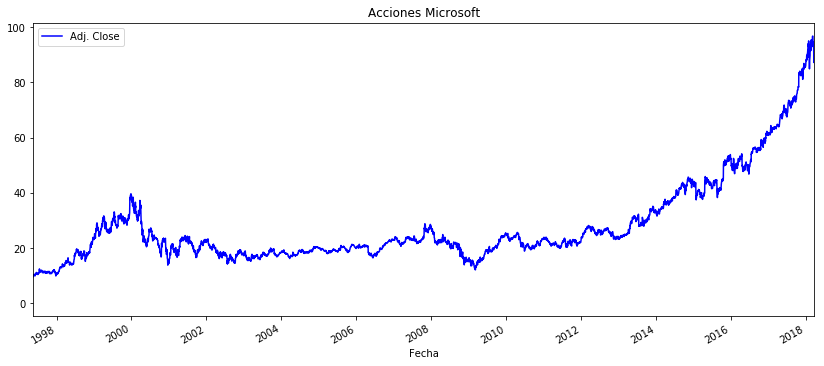

In [29]:
df['Adj. Close'].plot(figsize=(14,6), color='b')
plt.xlabel('Fecha')
plt.legend(loc='upper left')
plt.title('Acciones Microsoft')
plt.xlim(left=datetime.date(1997,5,16), right=datetime.date(2018,3,27))

plt.show()

In [22]:
forecast = 30 
df['Predicción'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Predicción'], 1))
X = preprocessing.scale(X)


/home/manelik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Predicción'])
y = y[:-forecast]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression() #clasificador
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
confidence

0.9865895592267229

In [25]:
forecast_predict = clf.predict(X_forecast)
print(forecast_predict)

[91.92739082 92.93161595 94.82734707 94.15103219 94.88883024 93.62842523
 93.88460511 96.2619544  97.65557295 96.40541514 95.96478574 95.02204378
 95.22698768 95.8315722  95.50366196 96.0570105  96.64110063 98.80325882
 99.03894431 96.62060624 96.0467633  96.38492075 96.81530295 95.06303256
 95.30896525 94.64289756 91.88640204 89.21188408 95.97503294 91.55849179]


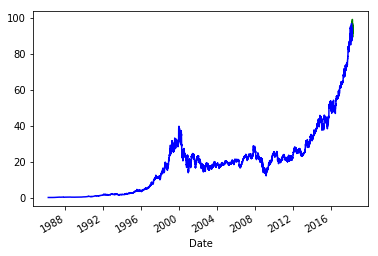

In [26]:
dates = pd.date_range(start='2018-03-28', end='2018-04-26')
plt.plot(dates, forecast_predict, color='g')
df['Adj. Close'].plot(color='b')

plt.show()

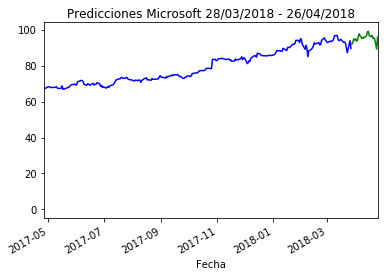

In [28]:
dates = pd.date_range(start='2018-03-28', end='2018-04-26')
plt.plot(dates, forecast_predict, color='g')
df['Adj. Close'].plot(color='b')
plt.xlim(left=datetime.date(2017,4,26), right=datetime.date(2018,4,26)) #Limite inferior de la gráfica 1 año antes del final predicho

plt.xlabel('Fecha')
plt.title('Predicciones Microsoft 28/03/2018 - 26/04/2018')

plt.show()